## STARTUP SUCCESS PREDICTION

In [50]:
# DATASET COLLECTION
import kagglehub

# Download latest version
path = kagglehub.dataset_download("manishkc06/startup-success-prediction")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Sohan\.cache\kagglehub\datasets\manishkc06\startup-success-prediction\versions\1


In [51]:
#IMPORTING THE LIBRARIES
import numpy as np #Linear algebra
import pandas as pd #data processing
pd.set_option('Display.max_column',None)
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve,log_loss
from sklearn.preprocessing import LabelEncoder,StandardScaler
import pickle
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import FunctionTransformer


In [52]:

for root, dirs, files in os.walk(path):
    for file in files:
        print(os.path.join(root, file))

C:\Users\Sohan\.cache\kagglehub\datasets\manishkc06\startup-success-prediction\versions\1\startup data.csv


In [53]:
# READ DATASET
data = os.path.join(path, "startup data.csv")
df = pd.read_csv(data)
df.head(10)


,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed
5,379,CA,37.406914,-122.090370,94043,c:22898,Mountain View,Mountain View CA 94043,Matisse Networks,0,1/1/2002,2/15/2009,7/18/2006,7/18/2006,4.5452,4.5452,5.0027,5.0027,3,1,7500000,1,CA,1,0,0,0,0,network_hosting,0,0,0,0,0,0,0,0,0,1,c:22898,0,0,0,1,0,0,3.0000,1,closed
6,195,CA,37.391559,-122.070264,94041,c:16191,Mountain View,NaN,RingCube Technologies,1,1/1/2005,NaN,9/21/2006,3/18/2010,1.7205,5.2110,3.0000,6.6082,6,3,26000000,2,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:16191,1,0,1,1,0,0,1.6667,1,acquired
7,875,CA,38.057107,-122.513742,94901,c:5192,San Rafael,NaN,ClairMail,1,1/1/2004,NaN,8/24/2005,10/4/2010,1.6466,6.7616,5.6055,7.3616,25,3,34100000,3,CA,1,0,0,0,0,finance,0,0,0,0,0,0,0,0,0,1,c:5192,0,0,1,1,0,1,3.5000,1,acquired
8,16,MA,42.712207,-73.203599,1267,c:1043,Williamstown,Williamstown MA 1267,VoodooVox,1,1/1/2002,NaN,8/2/2005,2/8/2013,3.5863,11.1123,8.0055,9.9945,13,3,9650000,4,MA,0,0,1,0,0,mobile,0,0,1,0,0,0,0,0,0,0,c:1043,1,0,1,0,0,1,4.0000,1,acquired
9,846,CA,37.427235,-122.145783,94306,c:498,Palo Alto,NaN,Doostang,1,6/1/2005,NaN,2/1/2007,2/5/2010,1.6712,4.6849,2.9178,6.1151,14,3,5750000,4,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:498,1,1,1,0,0,0,1.0000,1,acquired


## Description

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

## Data type identification

In [55]:
df.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

## Data numeric

In [56]:
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num=df.select_dtypes(include=numeric)
df_num.head(3)

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,1005,42.358880,-71.056820,1,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.00,0
1,204,37.238916,-121.973718,1,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.75,1
2,1001,32.901049,-117.192656,1,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.00,1


## Data categorical

In [57]:
df_cat=df.select_dtypes(include='object')
df_cat.head(4)

,state_code,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,state_code.1,category_code,object_id,status
0,CA,92101,c:6669,San Diego,NaN,Bandsintown,1/1/2007,NaN,4/1/2009,1/1/2010,CA,music,c:6669,acquired
1,CA,95032,c:16283,Los Gatos,NaN,TriCipher,1/1/2000,NaN,2/14/2005,12/28/2009,CA,enterprise,c:16283,acquired
2,CA,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,NaN,3/30/2010,3/30/2010,CA,web,c:65620,acquired
3,CA,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,NaN,2/17/2005,4/25/2007,CA,software,c:42668,acquired


In [58]:
print(df['status'].unique())


['acquired' 'closed']


## Changing 'Status' data value


In [59]:
df['status']=df.status.map({'acquired':1,'closed':0})

In [60]:
df['status'].astype(int)

0      1
1      1
2      1
3      1
4      0
      ..
918    1
919    0
920    0
921    1
922    1
Name: status, Length: 923, dtype: int64

## Drop column labels

In [61]:
for index,row in df.iterrows():
    if row['labels']!=row['labels']:
        print(index,row['labels'],row['status'])
df.drop(['labels'],axis=1,inplace=True)

## VISUALIZATION 

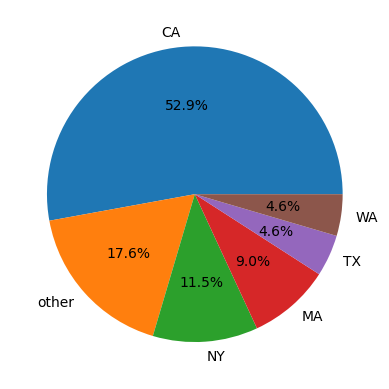

In [62]:
import matplotlib.pyplot as plt

df['State'] = 'other'
df.loc[df['state_code'] == 'CA', 'State'] = 'CA'
df.loc[df['state_code'] == 'NY', 'State'] = 'NY'
df.loc[df['state_code'] == 'MA', 'State'] = 'MA'
df.loc[df['state_code'] == 'TX', 'State'] = 'TX'
df.loc[df['state_code'] == 'WA', 'State'] = 'WA'
state_count = df['State'].value_counts()
plt.pie(state_count, labels=state_count.index, autopct='%1.1f%%')
plt.show()


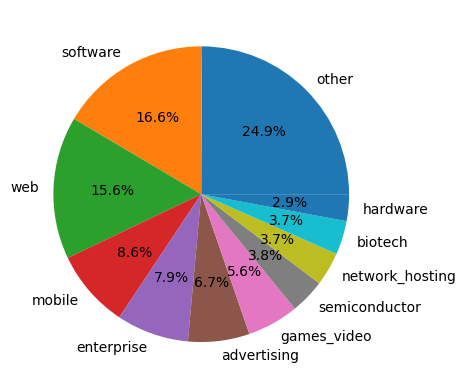

In [63]:
df['category'] = 'other'
df.loc[df['category_code'] == 'software', 'category'] = 'software'
df.loc[df['category_code'] == 'web', 'category'] = 'web'
df.loc[df['category_code'] == 'mobile', 'category'] = 'mobile'
df.loc[df['category_code'] == 'enterprise', 'category'] = 'enterprise'
df.loc[df['category_code'] == 'advertising', 'category'] = 'advertising'
df.loc[df['category_code'] == 'games_video', 'category'] = 'games_video'
df.loc[df['category_code'] == 'semiconductor', 'category'] = 'semiconductor'
df.loc[df['category_code'] == 'network_hosting', 'category'] = 'network_hosting'
df.loc[df['category_code'] == 'biotech', 'category'] = 'biotech'
df.loc[df['category_code'] == 'hardware', 'category'] = 'hardware'
category_count = df['category'].value_counts()
plt.pie(category_count, labels=category_count.index, autopct='%1.1f%%')
plt.show()

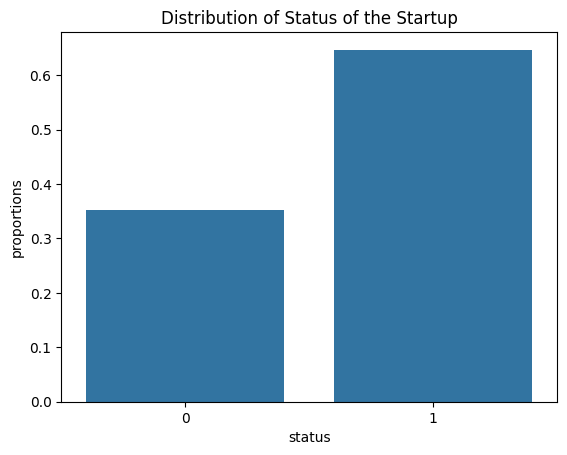

In [64]:
prop_df = df.groupby('status').size().reset_index(name='counts')
prop_df['proportions'] = prop_df['counts'] / prop_df['counts'].sum()
sns.barplot(data=prop_df, x='status', y='proportions')
plt.title('Distribution of Status of the Startup')
plt.show()

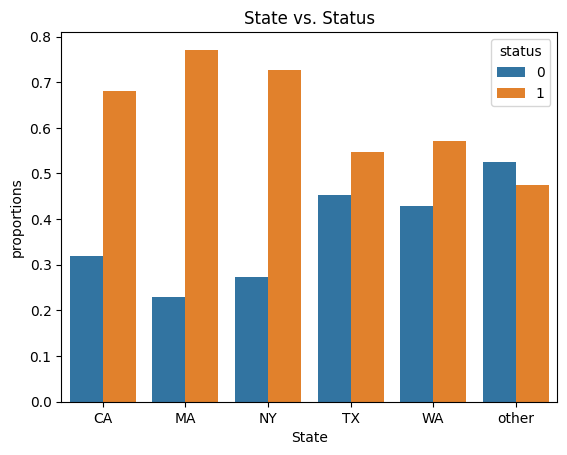

In [65]:
prop_df = df.groupby(['State', 'status'], group_keys=True).size().reset_index(name='count')
prop_df['proportions'] = prop_df.groupby('State')['count'].transform(lambda x: x / x.sum())
sns.barplot(data=prop_df, x='State', y='proportions', hue='status')
plt.title('State vs. Status')
plt.show()

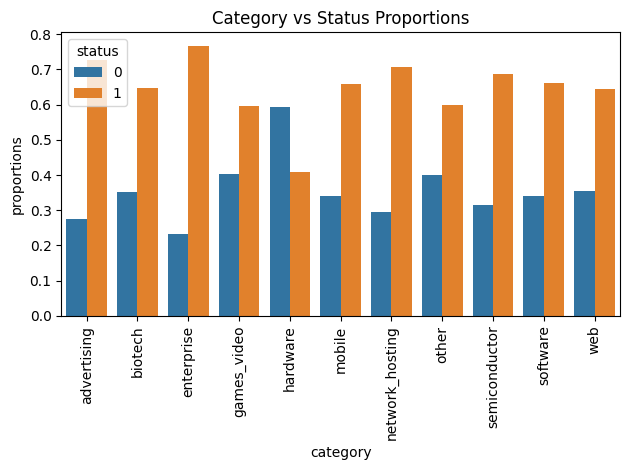

In [66]:
prop_df = df.groupby(["category", "status"]).size().reset_index(name="counts")
prop_df["proportions"] = prop_df.groupby("category")["counts"].transform(lambda x: x / float(x.sum()))
sns.barplot(data=prop_df, x="category", y="proportions", hue="status")
plt.xticks(rotation=90)
plt.title("Category vs Status Proportions")
plt.tight_layout()
plt.show()

<Axes: xlabel='category', ylabel='proportions'>

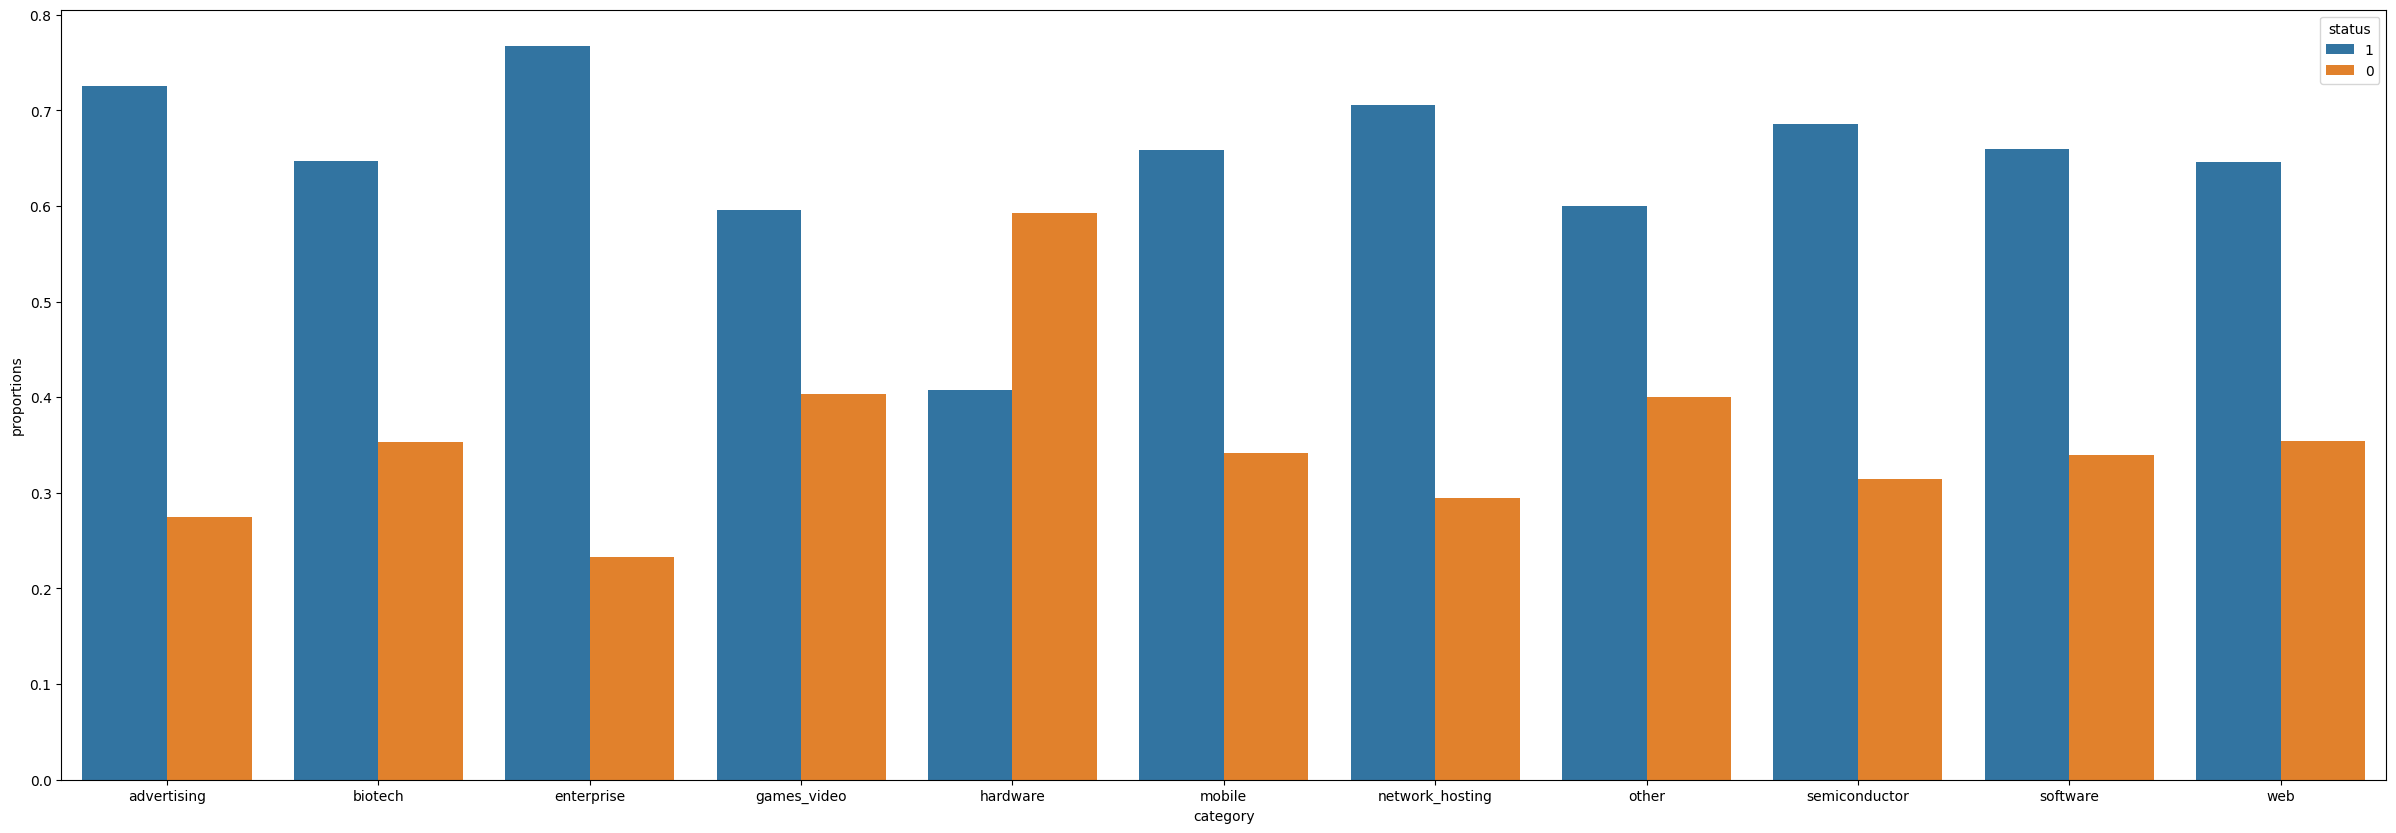

In [67]:
fig, ax = plt.subplots(figsize=(30,10))
prop_df = df.groupby(['category', 'status']).size().reset_index(name='counts')
prop_df['proportions'] = prop_df.groupby('category')['counts'].transform(lambda x: x/float(x.sum()))
status_order = sorted(prop_df['status'].unique(), reverse=True)
sns.barplot(data=prop_df, x='category', y='proportions', hue='status', hue_order=status_order, ax=ax)


Text(0.5, 1.0, 'Category wise evolution of startups')

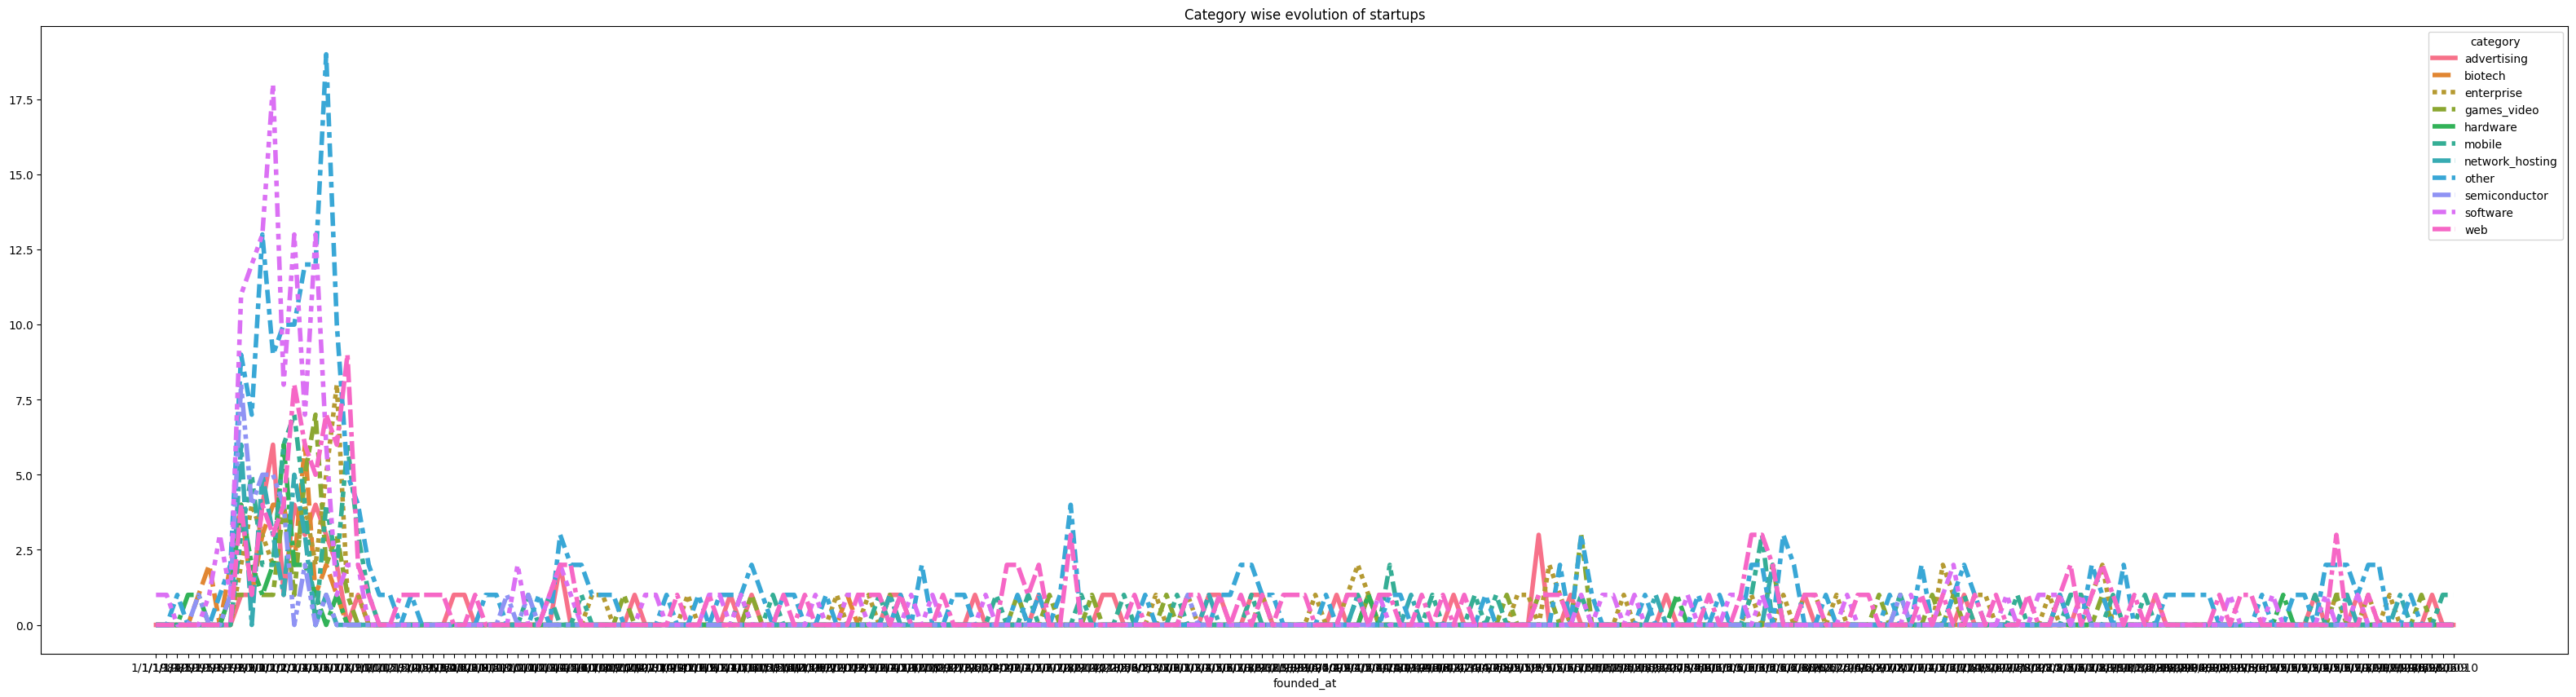

In [68]:

cat_year = pd.crosstab(index=df['founded_at'], columns=df['category'])
fig, ax = plt.subplots(figsize=(40, 10))
sns.lineplot(data=cat_year, lw=4)
plt.title("Category wise evolution of startups")

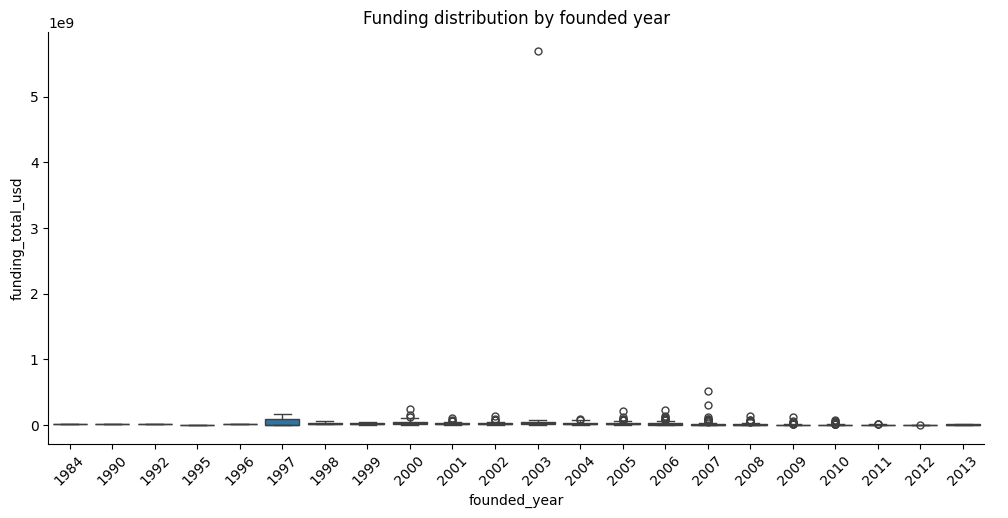

In [69]:
df['founded_year'] = pd.to_datetime(df['founded_at'], errors='coerce').dt.year.astype(str)

sns.catplot(
    data=df,
    x="founded_year",
    y="funding_total_usd",
    kind="box",
    height=5,
    aspect=2,
    order=[
        '1984', '1990', '1992', '1995', '1996', '1997', '1998', '1999',
        '2000', '2001', '2002', '2003', '2004', '2005', '2006',
        '2007', '2008', '2009', '2010', '2011', '2012', '2013'
    ]
)

plt.xticks(rotation=45)
plt.title("Funding distribution by founded year")
plt.show()


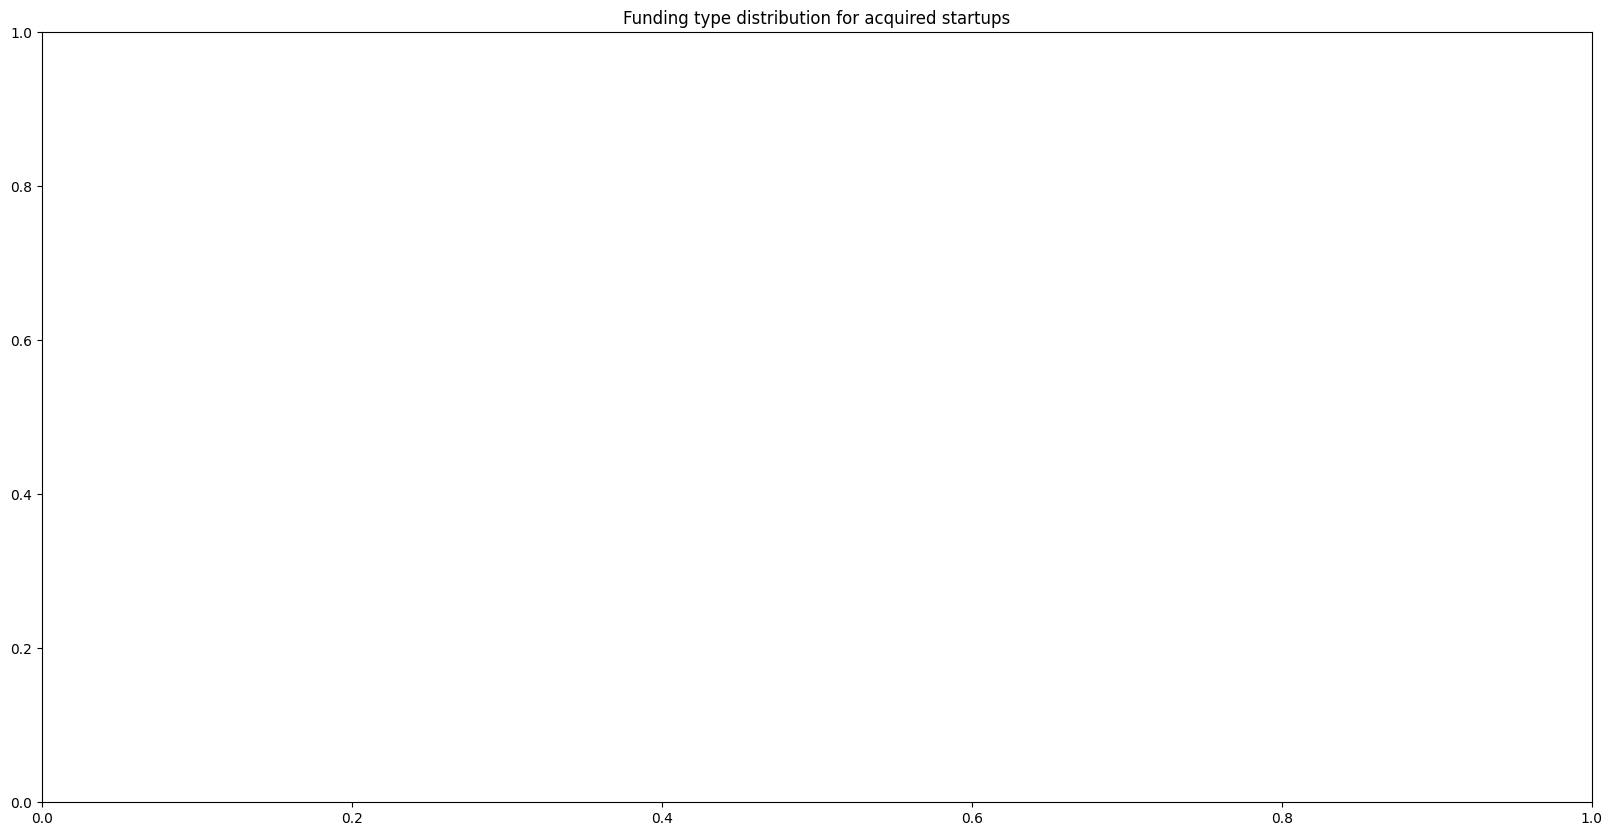

In [70]:
fig, ax = plt.subplots(figsize=(20, 10))

d = df[df['status'] == 'acquired']
f = d[["has_VC", "has_angel", "has_roundA", "has_roundB", "has_roundC", "has_roundD"]]

melted = pd.melt(f)
sns.countplot(data=melted, x='variable', hue='value')

plt.title("Funding type distribution for acquired startups")
plt.show()

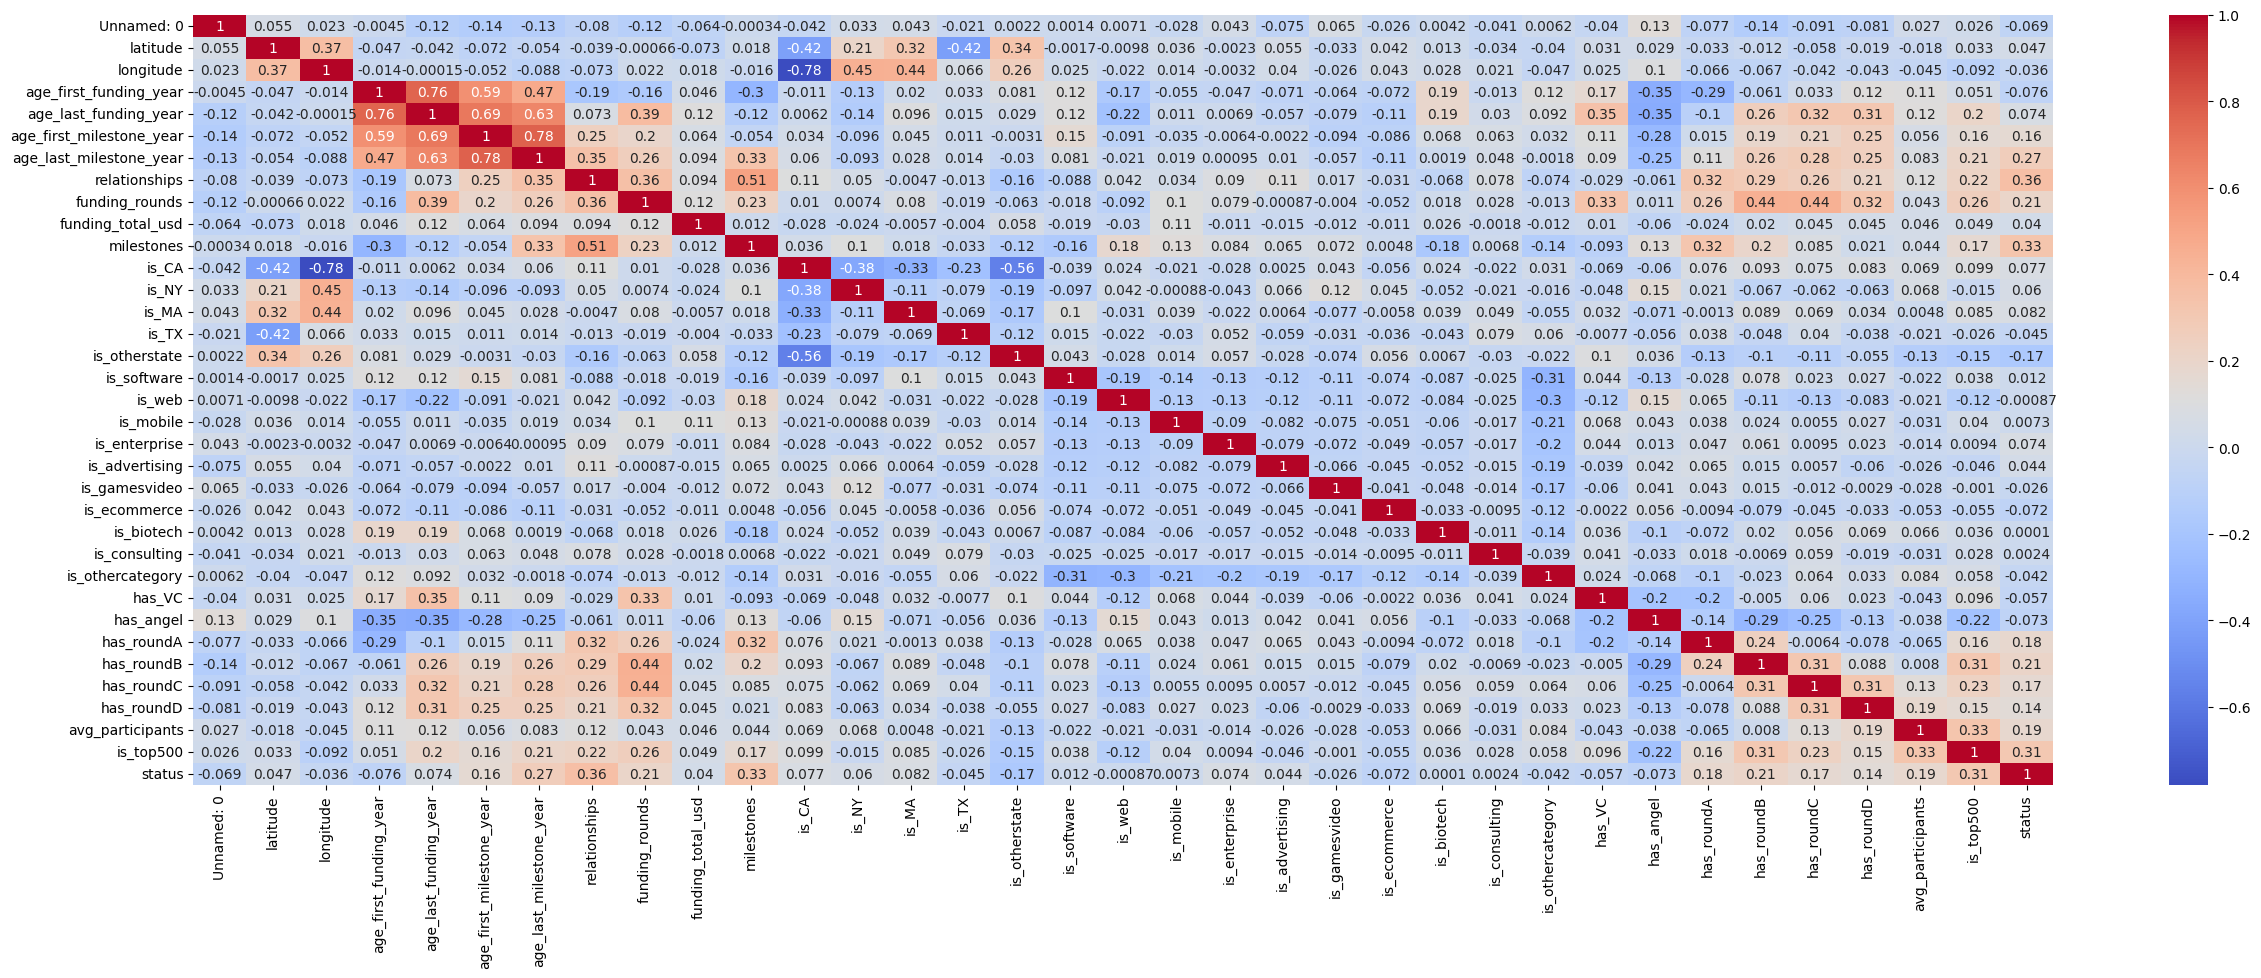

In [71]:
fig, ax = plt.subplots(figsize=(30, 10))
corr = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

## Missing values

In [72]:
df.isnull().sum()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enter

## Handling Missing Values

In [73]:
df['Unnamed: 6'] = df.apply(lambda row: (row.city) + " " + (row.state_code) + " " +(row.zip_code)  , axis = 1)
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,State,category,founded_year
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,CA,other,2007
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,CA,enterprise,2000
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,CA,web,2009
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,CA,software,2002
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,CA,games_video,2010


## Handling Missing Value closed_at

In [74]:
df['closed_at']=df['closed_at'].fillna(value='31/12/2003')

# Handling Missing Value age_first_milestone_year and age_last_milestone_year


In [75]:
df['age_first_milestone_year'] = df['age_first_milestone_year'].fillna(value="0")
df['age_last_milestone_year'] = df['age_last_milestone_year'].fillna(value="0")

## Handling missing value state_code.1

In [76]:
for index,row in df.iterrows():
    if row['state_code']!=row['state_code']:
        print(index,row['state_code'],row['state_code'])
df.drop(['state_code.1'],axis=1,inplace=True)

## Startup --> acquired

In [77]:
df_acquired = df[(df["status"] == True)]
df_acquired.shape

(597, 50)

## Startup -->closed

In [78]:
df_acquired = df[(df["status"] == False)]
df_acquired.shape

(326, 50)

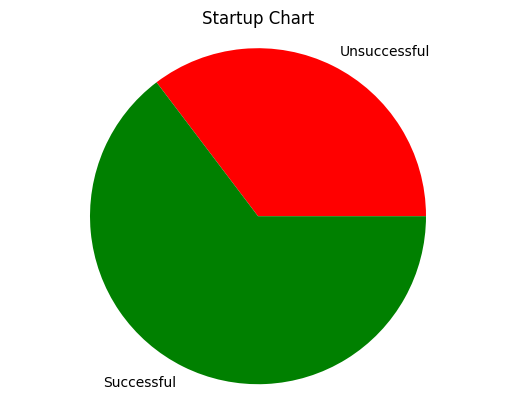

In [79]:
value_counts=df['status'].value_counts().to_dict()
fig,ax=plt.subplots()
_=ax.pie(x=[value_counts[False],value_counts[True]],labels=['Unsuccessful','Successful'],colors=['red','green'])
_=ax.axis('equal')
_=ax.set_title('Startup Chart')

## Category having largest number of startup

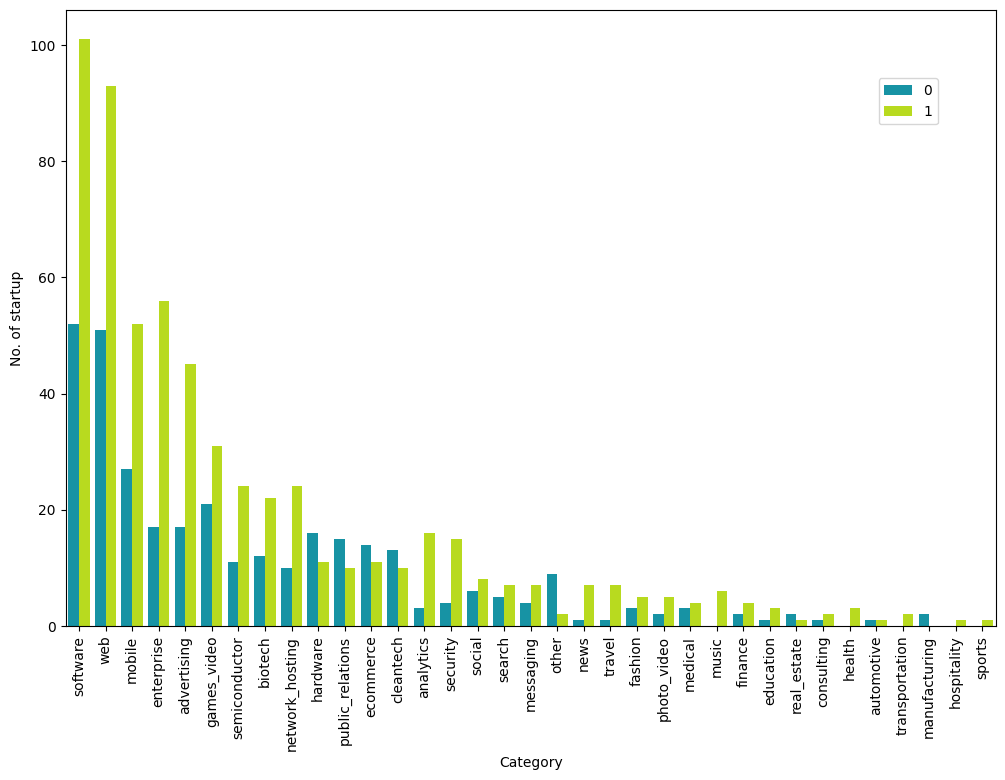

In [80]:
fig, ax = plt.subplots(figsize=(12,8))

_ = sns.countplot(x="category_code", hue="status", data=df, palette="nipy_spectral",
              order=df.category_code.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

## Category having largest number Success rate

In [81]:
data1 = df[df['status']==1].groupby(['category_code']).agg({'status':'count'}).reset_index()
data1.columns=['category_code','total_success']

data2 = df[df['status']==0].groupby(['category_code']).agg({'status':'count'}).reset_index()
data2.columns=['category_code','total_closed']

data3=df.groupby(['category_code']).agg({'status':'count'}).reset_index()
data3.columns=['category_code','total_startup']

data1= data1.merge(data2, on='category_code')
data1= data1.merge(data3, on='category_code')

data1['success_rate']= round((data1['total_success'] / data1['total_startup']) * 100,2)

most_succes_rate = data1.sort_values('success_rate', ascending=False)
most_succes_rate

,category_code,total_success,total_closed,total_startup,success_rate
17,news,7,1,8,87.50
27,travel,7,1,8,87.50
1,analytics,16,3,19,84.21
23,security,15,4,19,78.95
8,enterprise,56,17,73,76.71
7,education,3,1,4,75.00
0,advertising,45,17,62,72.58
19,photo_video,5,2,7,71.43
16,network_hosting,24,10,34,70.59
24,semiconductor,24,11,35,68.57


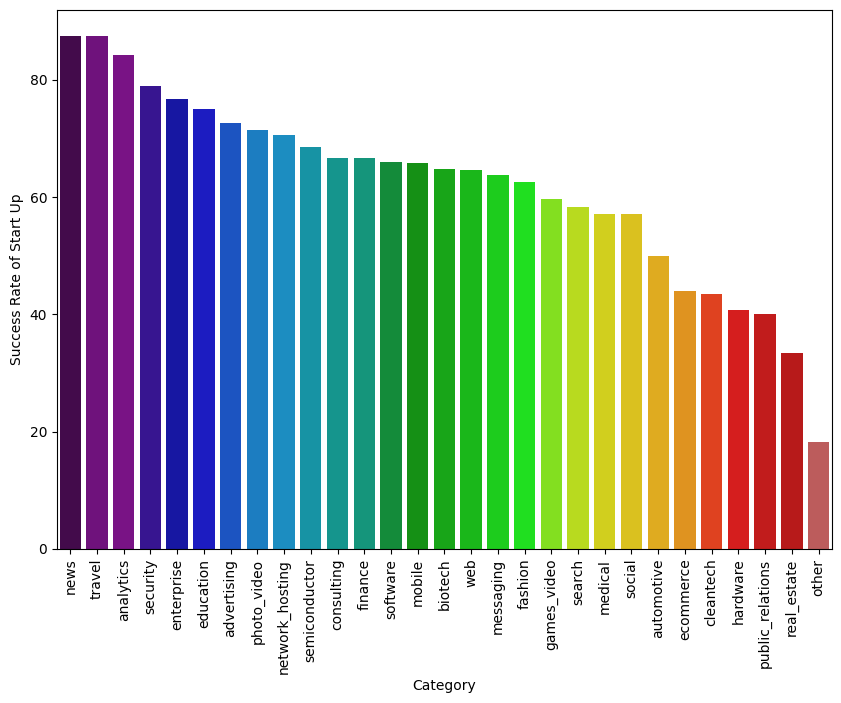

In [82]:
fig, ax = plt.subplots(figsize=(10,7))
_ = sns.barplot(x="category_code", y="success_rate", data=most_succes_rate,
                
                palette="nipy_spectral", ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="Success Rate of Start Up")

## Category having most number of total funding

In [83]:
funding_sorted_category = pd.pivot_table(df,
              index=['category_code'],
              values=['funding_total_usd'],
              aggfunc=['sum']
              ).reset_index()
funding_sorted_category.columns = ['category_code', 'funding_total_usd']
funding_sorted_category = funding_sorted_category.sort_values(['funding_total_usd'], ascending = False)
funding_sorted_category.head(10)

,category_code,funding_total_usd
18,mobile,7263750881
30,software,2657598865
34,web,1729035436
3,biotech,1723699484
8,enterprise,1338882096
4,cleantech,1300284730
28,semiconductor,1105156970
0,advertising,918619012
11,games_video,844643530
12,hardware,773938873


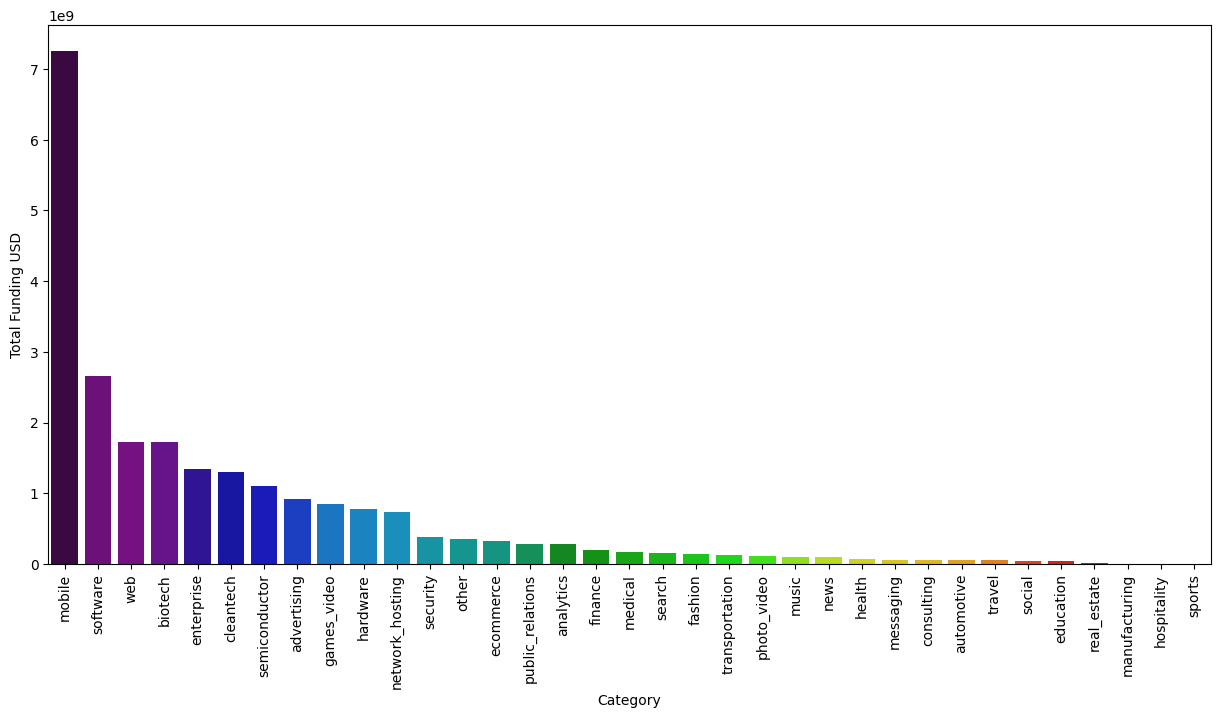

In [84]:
fig, ax = plt.subplots(figsize=(15,7))
_ = sns.barplot(x="category_code", y="funding_total_usd", data=funding_sorted_category,
                palette="nipy_spectral", ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="Total Funding USD")

## State having most number of startup

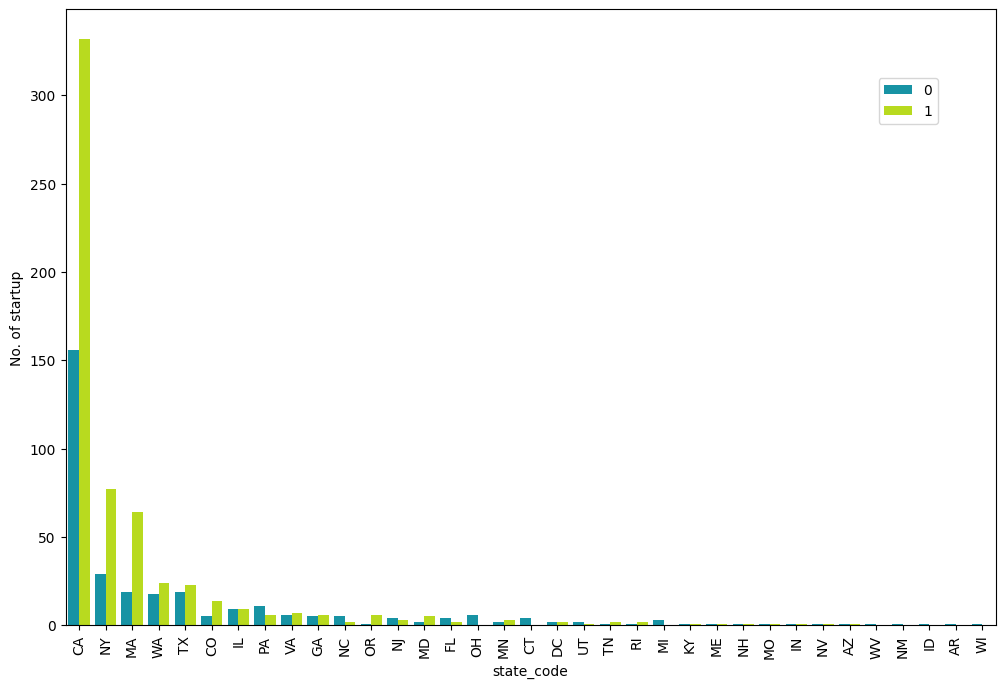

In [85]:
fig, ax = plt.subplots(figsize=(12,8))

_ = sns.countplot(x="state_code", hue="status", data=df, palette="nipy_spectral",
              order=df.state_code.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="state_code", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

In [86]:

state = df.groupby(['state_code']).size().rename('num_startup').reset_index()

most_state = state[state.groupby('state_code')['num_startup'].transform(max) == state['num_startup']]
most_state= most_state.sort_values('num_startup', ascending=False)
most_state

,state_code,num_startup
2,CA,488
23,NY,106
12,MA,83
29,TX,42
32,WA,42
3,CO,19
9,IL,18
26,PA,17
31,VA,13
7,GA,11


## Data Preprocessing

## Duplicate values

In [87]:
duplicate=df[df.duplicated()]
print ("Duplicate Rows:")

Duplicate Rows:


## Check for negative value

In [88]:
neg = ["age_first_funding_year", "age_last_funding_year", 
       "age_first_milestone_year", "age_last_milestone_year"]

for col in neg:
    numeric_col = pd.to_numeric(df[col], errors='coerce')
    has_negative = (numeric_col < 0).any()
    print(f"Is there any negative value in '{col}' column: {has_negative}")


Is there any negative value in 'age_first_funding_year' column: True
Is there any negative value in 'age_last_funding_year' column: True
Is there any negative value in 'age_first_milestone_year' column: True
Is there any negative value in 'age_last_milestone_year' column: True


In [89]:
cols = ['age_first_funding_year', 'age_last_funding_year', 
        'age_first_milestone_year', 'age_last_milestone_year']

for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df = df[df[col] >= 0]


## Outliers

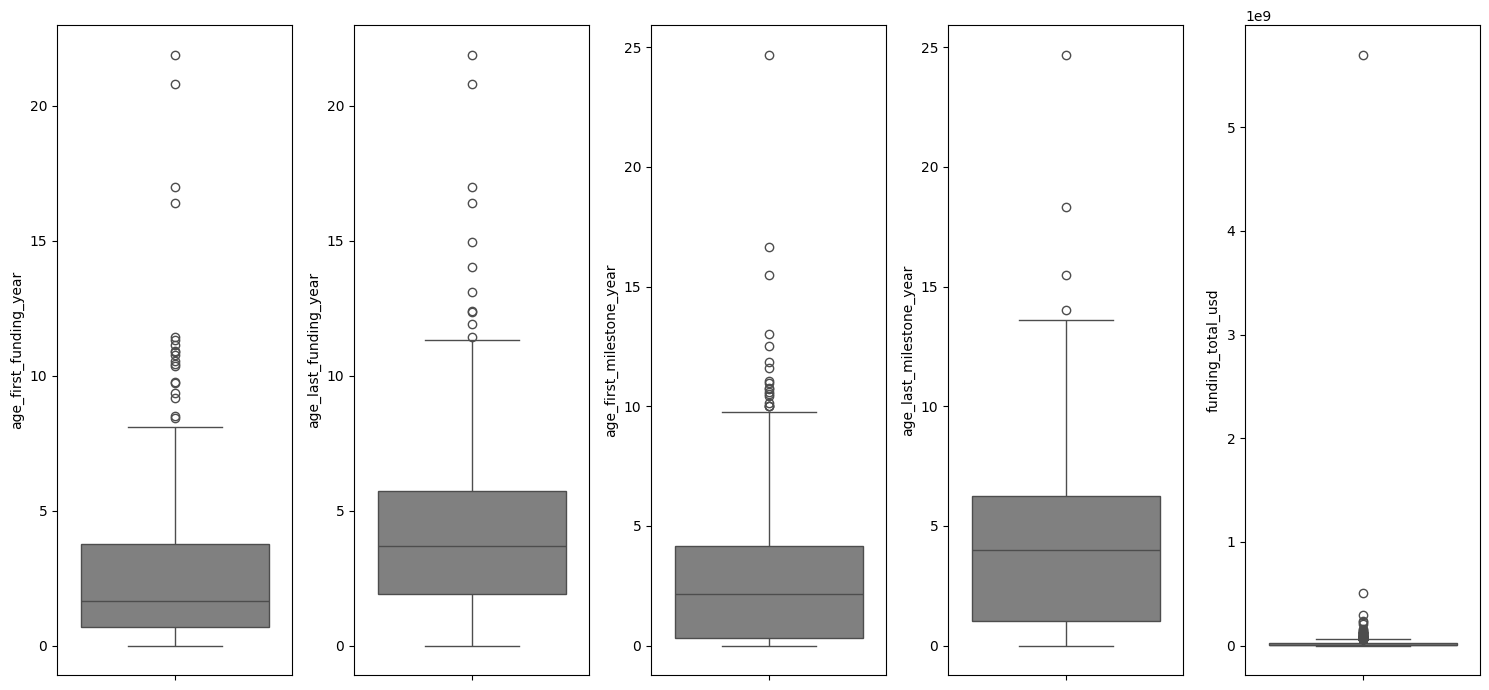

In [90]:
features = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','funding_total_usd']

plt.figure(figsize=(15, 7))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='gray', orient='v')
    plt.tight_layout()

In [91]:
df["age_first_funding_year"] = np.log1p(df["age_first_funding_year"])
df["age_last_funding_year"] = np.log1p(df["age_last_funding_year"])
df["age_first_milestone_year"] = np.log1p(df["age_first_milestone_year"])
df["age_last_milestone_year"] = np.log1p(df["age_last_milestone_year"])
df["funding_total_usd"] = np.log1p(df["funding_total_usd"])

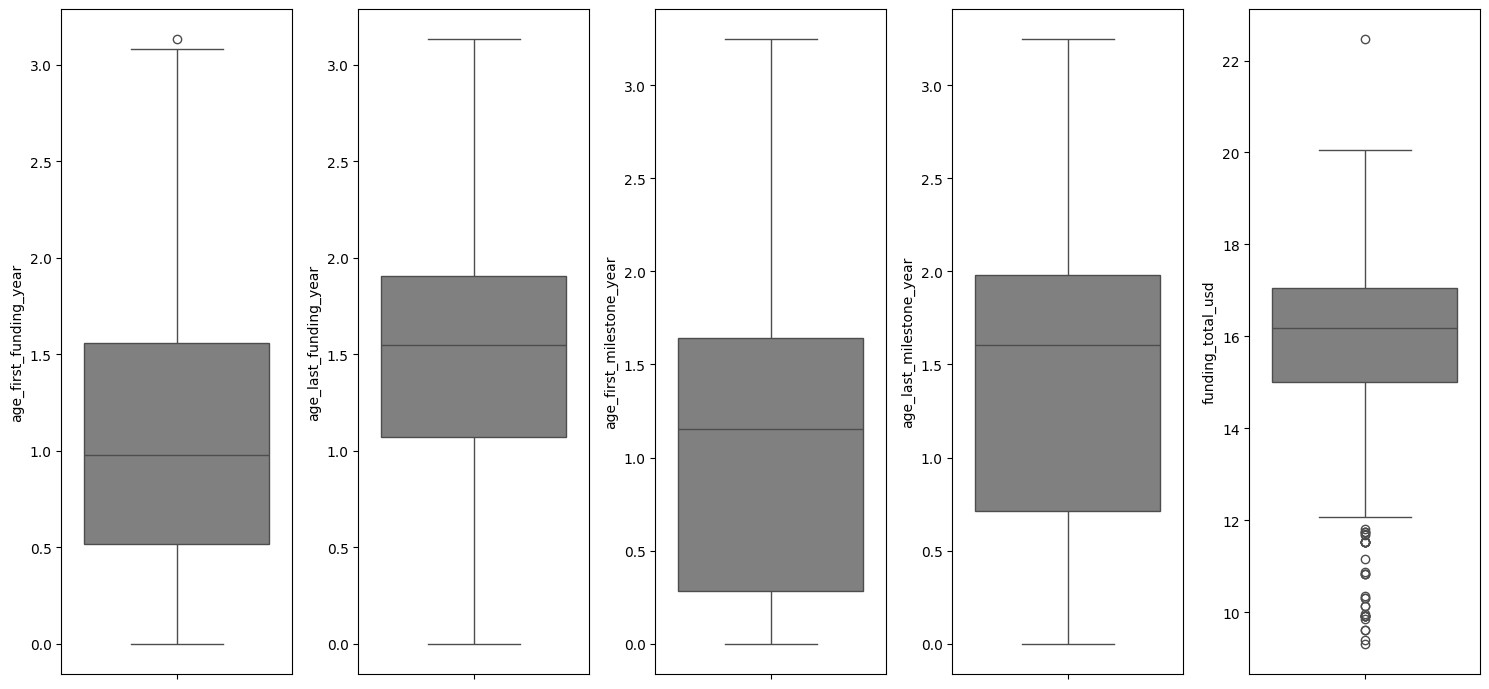

In [92]:
features = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','funding_total_usd']

plt.figure(figsize=(15, 7))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='gray', orient='v')
    plt.tight_layout()

## Feature Scaling

## Adding new column

In [93]:
df['has_RoundABCD'] = np.where((df['has_roundA'] == 1) | (df['has_roundB'] == 1) | (df['has_roundC'] == 1) | (df['has_roundD'] == 1), 1, 0)
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,State,category,founded_year,has_RoundABCD
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1/1/2007,31/12/2003,4/1/2009,1/1/2010,1.178440,1.386969,1.734925,2.041753,3,3,12.834684,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,CA,other,2007,0
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1/1/2000,31/12/2003,2/14/2005,12/28/2009,1.812542,2.397650,2.080129,2.080129,9,4,17.506887,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,CA,enterprise,2000,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,31/12/2003,3/30/2010,3/30/2010,0.709463,0.709463,0.899145,1.164868,5,1,14.771022,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,CA,web,2009,1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,31/12/2003,2/17/2005,4/25/2007,1.418641,1.842944,1.946296,1.946296,5,3,17.504390,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,CA,software,2002,1
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.000000,0.981517,0.037681,0.037681,2,2,14.077876,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,CA,games_video,2010,0


In [94]:
df['has_Investor'] = np.where((df['has_VC'] == 1) | (df['has_angel'] == 1), 1, 0)
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,State,category,founded_year,has_RoundABCD,has_Investor
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1/1/2007,31/12/2003,4/1/2009,1/1/2010,1.178440,1.386969,1.734925,2.041753,3,3,12.834684,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,CA,other,2007,0,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1/1/2000,31/12/2003,2/14/2005,12/28/2009,1.812542,2.397650,2.080129,2.080129,9,4,17.506887,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,CA,enterprise,2000,1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,31/12/2003,3/30/2010,3/30/2010,0.709463,0.709463,0.899145,1.164868,5,1,14.771022,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,CA,web,2009,1,0
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,31/12/2003,2/17/2005,4/25/2007,1.418641,1.842944,1.946296,1.946296,5,3,17.504390,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,CA,software,2002,1,0
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.000000,0.981517,0.037681,0.037681,2,2,14.077876,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,CA,games_video,2010,0,1


In [95]:
df['has_both'] = np.where((df['has_RoundABCD'] == 0) & (df['has_Investor'] == 1), 1, 0)
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,State,category,founded_year,has_RoundABCD,has_Investor,has_both
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1/1/2007,31/12/2003,4/1/2009,1/1/2010,1.178440,1.386969,1.734925,2.041753,3,3,12.834684,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,CA,other,2007,0,1,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1/1/2000,31/12/2003,2/14/2005,12/28/2009,1.812542,2.397650,2.080129,2.080129,9,4,17.506887,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,CA,enterprise,2000,1,1,0
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,31/12/2003,3/30/2010,3/30/2010,0.709463,0.709463,0.899145,1.164868,5,1,14.771022,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,CA,web,2009,1,0,0
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,31/12/2003,2/17/2005,4/25/2007,1.418641,1.842944,1.946296,1.946296,5,3,17.504390,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,CA,software,2002,1,0,0
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.000000,0.981517,0.037681,0.037681,2,2,14.077876,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,CA,games_video,2010,0,1,1


In [96]:
df['invalid_startup'] = np.where((df['has_RoundABCD'] == 0) & (df['has_VC'] == 0) & (df['has_angel'] == 0), 1, 0)
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,State,category,founded_year,has_RoundABCD,has_Investor,has_both,invalid_startup
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1/1/2007,31/12/2003,4/1/2009,1/1/2010,1.178440,1.386969,1.734925,2.041753,3,3,12.834684,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,CA,other,2007,0,1,1,0
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1/1/2000,31/12/2003,2/14/2005,12/28/2009,1.812542,2.397650,2.080129,2.080129,9,4,17.506887,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,CA,enterprise,2000,1,1,0,0
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,31/12/2003,3/30/2010,3/30/2010,0.709463,0.709463,0.899145,1.164868,5,1,14.771022,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,CA,web,2009,1,0,0,0
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,31/12/2003,2/17/2005,4/25/2007,1.418641,1.842944,1.946296,1.946296,5,3,17.504390,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,CA,software,2002,1,0,0,0
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.000000,0.981517,0.037681,0.037681,2,2,14.077876,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,CA,games_video,2010,0,1,1,0


In [97]:
# Convert both columns safely
df['founded_at'] = pd.to_datetime(df['founded_at'], errors='coerce')
df['closed_at'] = pd.to_datetime(df['closed_at'], errors='coerce')

# Calculate age of startup
df['age_closed_startup'] = df['closed_at'] - df['founded_at']
df['age_startup_year'] = df['age_closed_startup'].dt.days / 365


In [98]:
import numpy as np

conditions = [
    (df['relationships'] <= 5),
    (df['relationships'] > 5) & (df['relationships'] <= 10),
    (df['relationships'] > 10) & (df['relationships'] <= 16),
    (df['relationships'] > 16)
]

values = ['4', '3', '2', '1']  

df['tier_relationships'] = np.select(conditions, values, default='0')


In [99]:
df['tier_relationships'] = df.tier_relationships.astype(int)

## Drop unused columns

In [100]:
df = df.drop(['state_code'],axis=1)
df = df.drop(['id'],axis=1)
df = df.drop(['Unnamed: 6'],axis=1)
df = df.drop(['category_code'],axis=1)
df = df.drop(['object_id'],axis=1)
df = df.drop(['zip_code'],axis=1)
df = df.drop(['founded_at'],axis=1)
df = df.drop(['closed_at'],axis=1)
df = df.drop(['first_funding_at'],axis=1)
df = df.drop(['last_funding_at'],axis=1)
df = df.drop(['city'],axis=1)
df = df.drop(['name'],axis=1)
df = df.drop(['Unnamed: 0'],axis=1)
df = df.drop(['latitude','longitude'],axis=1)
df = df.drop(['age_closed_startup'],axis=1)
df = df.drop(['relationships'],axis=1)

## Modeling

In [101]:
cat_feature = df.select_dtypes(include='object')
cat_feature.head()

,State,category,founded_year
0,CA,other,2007
1,CA,enterprise,2000
2,CA,web,2009
3,CA,software,2002
4,CA,games_video,2010


In [102]:
df.head()

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,State,category,founded_year,has_RoundABCD,has_Investor,has_both,invalid_startup,age_startup_year,tier_relationships
0,1.178440,1.386969,1.734925,2.041753,3,12.834684,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,1,CA,other,2007,0,1,1,0,-3.005479,4
1,1.812542,2.397650,2.080129,2.080129,4,17.506887,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,1,CA,enterprise,2000,1,1,0,0,4.000000,3
2,0.709463,0.709463,0.899145,1.164868,1,14.771022,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,1,CA,web,2009,1,0,0,0,-5.216438,4
3,1.418641,1.842944,1.946296,1.946296,3,17.504390,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,1,CA,software,2002,1,0,0,0,1.997260,4
4,0.000000,0.981517,0.037681,0.037681,2,14.077876,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,0,CA,games_video,2010,0,1,1,0,1.443836,4


## Train Test Split Data

In [103]:
X = df.drop('status', axis = 1) #
y = df['status']

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Shape of train and test of X and y

In [105]:
print("Shape of the X Train :", X_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the X test :", X_test.shape)
print("Shape of the y test :", y_test.shape)

Shape of the X Train : (672, 39)
Shape of the y Train : (672,)
Shape of the X test : (168, 39)
Shape of the y test : (168,)


In [106]:
import warnings
warnings.filterwarnings('ignore')

## Random Forest

In [107]:
from sklearn.metrics import auc,precision_recall_curve,f1_score

model = RandomForestClassifier()

model.fit(X_train,y_train)


y_pred_rf = model.predict(X_test)

print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

model_cm = confusion_matrix(y_test, y_pred_rf)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(model_cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

model_cr = classification_report(y_test, y_pred_rf)
print(model_cr)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_rf)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
Precision_Recall_rfs = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_rfs)

ValueError: could not convert string to float: 'CA'

## DEPLOYMENT

In [ ]:
import pickle
with open("startup_model.pkl", "wb") as f:
    pickle.dump(model, f)